## E-learning courses

The project is about to promote the products and we would like to invest some money in advertisement. The goal is to find out the two best markets to advertise our producte in. 

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
link='https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
df=pd.read_csv(link, low_memory=0)

In [288]:
df.shape

(18175, 136)

In [289]:
df.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's easier to use a ready made data set, also it's really expensive in monetary terms and in time terms to organize a survey. THe data set is about the developers that have attended the courses in the freeCodeCamp e-lerning platform. The dataset is available on GitHub. 

In [290]:
df["JobRoleInterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

The majority of people are interested in the career of Full-Stack Web Developer (this for 11,77%): They are follewed by Front-End Web Developer (6,43%) and Data Scientist (2,17%). It seems a big part of the people are interested in more than one subject. The web developers and mobile devolopers are not so many (for instance mobile developers represent 1,67%).

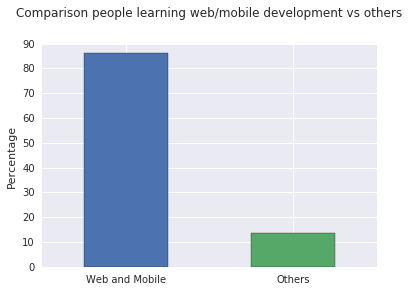

In [291]:
web_mobile= df["JobRoleInterest"].str.contains("Web Developer| Mobile Developer")
frq= web_mobile.value_counts(normalize=True)*100
frq.plot.bar()
plt.title("Comparison people learning web/mobile development vs others", y=1.10)
plt.ylabel("Percentage")
plt.xticks([0, 1],["Web and Mobile", "Others"], rotation=0)
plt.show()

The majority of people are learning Web and Mobile development compared to other subjects. 

In [292]:
df1 = df[df['JobRoleInterest'].notnull()].copy()


In [293]:
df1["CountryLive"].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Croatia     

In [294]:
df1["CountryLive"].value_counts(normalize=True)*100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Hungary    

Analyzing the result, the two best markets for advertisement are United States and India. They have rispectvely 3125 and 528 users. We have also to understand if/how people are willing to spend. 

In [295]:
df1["MonthsProgramming"].replace(0,1, inplace=True)
df1["amount_money"]= df1["MoneyForLearning"]/df1["MonthsProgramming"]
df1["amount_money"].isnull().sum()

675

In [296]:
df1=df1[df1["amount_money"].notnull()]
df1 = df1[df1['CountryLive'].notnull()]
mean=df1["amount_money"].groupby(by=df1["CountryLive"]).mean()
mean[['United States of America','India', 'United Kingdom','Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: amount_money, dtype: float64

It was expected that people in Canada and United Kingdom would have an higher value, at least an higher value compared to India. 

In [297]:
df2 = df1[df1['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



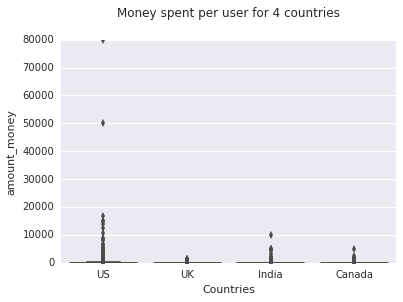

In [298]:
sns.boxplot(x= "CountryLive", y="amount_money", data=df2)
plt.title("Money spent per user for 4 countries", y=1.08)
plt.xlabel("Countries")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

Looking at the outliers it's hard to say something about UK, India and Canada but for United States there are two that spents more than 50000$ that it's impossible.

In [299]:
df2=df2[df2["amount_money"]<20000]

In [300]:
df2["amount_money"].groupby(by=df2["CountryLive"]).mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: amount_money, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



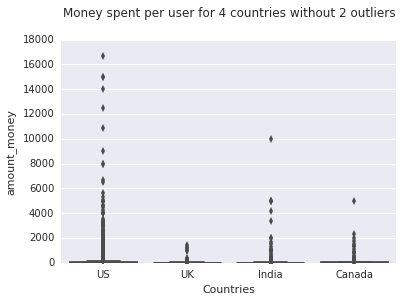

In [301]:
sns.boxplot(x= "CountryLive", y="amount_money", data=df2)
plt.title("Money spent per user for 4 countries without 2 outliers", y=1.08)
plt.xlabel("Countries")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

In [302]:
indians_5000= df2[(df2["CountryLive"]=="India") & (df2["amount_money"]>=5000)]
indians_5000

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,amount_money
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.0
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0


The outliers didn't attend any bootcamp, so the high amount of money spent doesn't seem justified. 

In [303]:
df2=df2.drop([1728,7989,8126,13398])

In [304]:
other_outliers=df2[df2["amount_money"]>=5000]
other_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,amount_money
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3145,34.0,1.0,0.0,0.0,Hackbright Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5666.666667
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
5769,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
6528,37.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667


Only few people, who spent more or equal to 5000$, have attended a bootcamp. Let's remove the ones didn't attend one.

In [305]:
other_outliers=other_outliers[other_outliers["AttendedBootcamp"]==0]
other_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,amount_money
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
5769,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
6528,37.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000
17231,50.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000


In [306]:
df2=df2.drop([3930,5769,6528,7198,16650,16997,17231])
                                                      

In [311]:
finale_mean =df2["amount_money"].groupby(by=df2["CountryLive"]).mean()
finale_mean

CountryLive
Canada                      113.510961
India                        81.812102
United Kingdom               45.534443
United States of America    157.222340
Name: amount_money, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



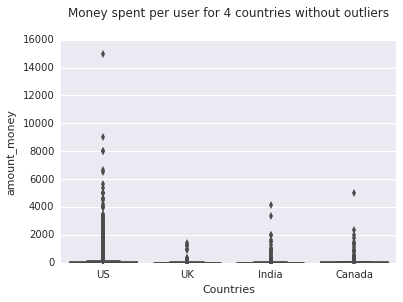

In [308]:
sns.boxplot(x= "CountryLive", y="amount_money", data=df2)
plt.title("Money spent per user for 4 countries without outliers", y=1.08)
plt.xlabel("Countries")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

In [309]:
canada_outliers=df2[(df2["CountryLive"]=="Canada") & (df2["amount_money"]>=4000)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,amount_money
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


The best markets for advertiment are United States of America for sure with a mean  of 157,22.


In [312]:
n_people=df2["CountryLive"].value_counts()
pd.DataFrame({"n_people":n_people, "amount_spent": finale_mean})

,amount_spent,n_people
Canada,113.510961,240
India,81.812102,459
United Kingdom,45.534443,279
United States of America,157.222340,2924


United Kingdom is not an option for the low amount of many spent there. For the amount of people, a percentage of the budget could be spent in India e partially in Canada. There are several options. Probably, it's a a decision for the marketing team st this point. 